## Series de Taylor

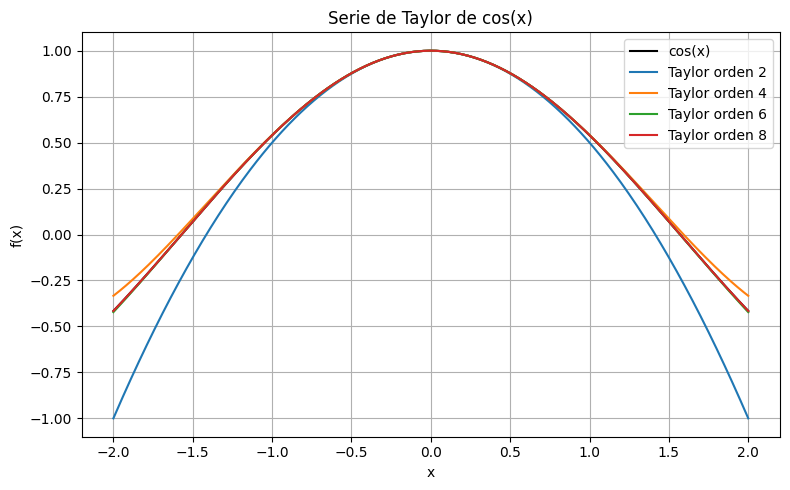

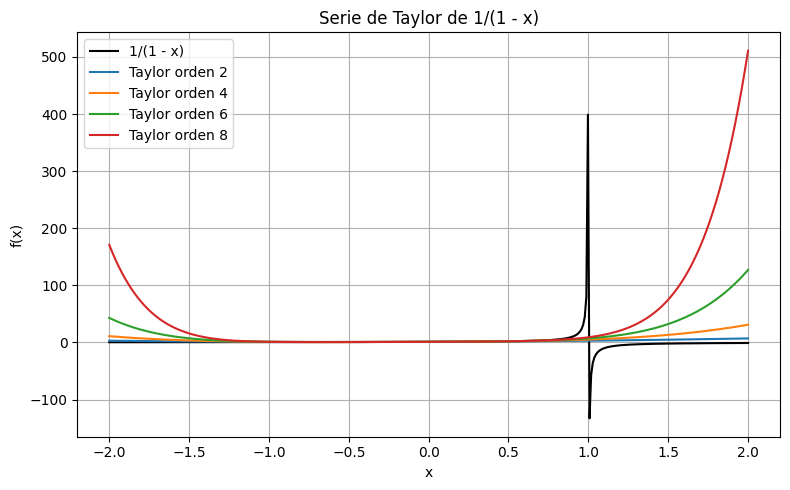

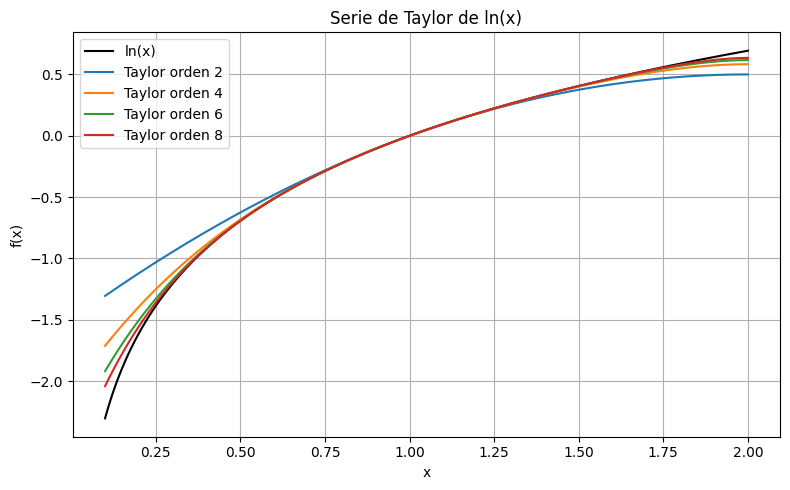

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, cos, ln, series, lambdify

# Configuración general
x = symbols('x')
ordenes = [2, 4, 6, 8]
x_vals = np.linspace(-2, 2, 400)

# Funciones y sus puntos de expansión
funcs = {
    'cos(x)': (cos(x), 0),
    '1/(1 - x)': (1/(1 - x), 0),
    'ln(x)': (ln(x), 1)
}

# Gráficos para cada función
for name, (func, x0) in funcs.items():
    # Para ln(x) usamos un dominio más pequeño
    if name == 'ln(x)':
        x_vals_plot = np.linspace(0.1, 2, 400)  # evita x <= 0 y mantiene |x - 1| < 1
    else:
        x_vals_plot = x_vals

    plt.figure(figsize=(8, 5))
    f_exacta = lambdify(x, func, modules='numpy')
    plt.plot(x_vals_plot, f_exacta(x_vals_plot), label=f'{name}', color='black')

    for n in ordenes:
        taylor = series(func, x, x0, n+1).removeO()
        f_taylor = lambdify(x, taylor, modules='numpy')
        plt.plot(x_vals_plot, f_taylor(x_vals_plot), label=f'Taylor orden {n}')
    
    plt.title(f'Serie de Taylor de {name}')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.tight_layout()
    plt.show()


